# Algoritmos de ordenação

In [ ]:
!pip -q install matplotlib tqdm numpy

In [ ]:
import numpy as np
from time import perf_counter
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

## Algoritmos

Preencha a célula abaixo com cada algoritmo de ordenação.

In [ ]:
def bubble_sort(dados):
    for _ in range(len(dados)-1):
      for i in range(len(dados)-1-_):
        if dados[i] > dados[i+1]:
          dados[i], dados[i+1] = dados[i+1], dados[i]

def insertion_sort(dados):
   for i in range(1,len(dados)):
      j =  i
      while dados[j] < dados[j-1] and j > 0:
        dados[j], dados[j-1] = dados[j-1], dados[j]
        j -= 1

def selection_sort(dados):
  for i in range(len(dados)):
    menor = dados[i]
    pos_menor = i
    for j in range(i+1, len(dados)):
      if dados[j] < menor:
        menor = dados[j]
        pos_menor = j

    dados[i], dados[pos_menor] = dados[pos_menor], dados[i]





def merge_sort(dados):
  if len(dados) < 2:
    return dados
  else:
    meio = len(dados) // 2
    return merge(merge_sort(dados[:meio]), merge_sort(dados[meio:]))


def merge(d1,d2):
  lista_resul = list()
  while d1 or d2:
    if d1 and d2:
      if d1[0] < d2[0]:
        lista_resul.append(d1.pop(0))

      else: lista_resul.append(d2.pop(0))

    else:
       lista_resul.extend(d1+d2)
       break

  return lista_resul



def sort(dados):
  return dados.sort()





def get_num_i(num, i, b=10):
  return (num % (b**i)) // (b**(i-1))


def counting_sort(dados, i, b=10):
  cont = [0] * b
  pos = [0] * b
  result = [None] * len(dados)

  for val in dados:
    cont[get_num_i(val, i, b)] += 1

  for j in range(1, b):
    pos[j] = cont[j-1] + pos[j-1]

  for val in dados:
    k = get_num_i(val,i,b)
    result[pos[k]] = val
    pos[k] += 1
  return result




def radix_sort(dados, b=10):
  if not dados: return []
  result = dados
  for i in range(1, len(str(max(dados))) + 1):
    result = counting_sort(result, i, b)

  return result















def partition(entrada, ini, fim):
  pivot = entrada[ini]
  low = ini+1
  high = fim

  while True:
    while low <= high and entrada[high] >= pivot:
      high -= 1

    while low <= high and entrada[low] <= pivot:
      low += 1

    if low <= high:
      entrada [low], entrada [high] =  entrada[high], entrada[low]
    else:
      break

  entrada[ini], entrada[high] = entrada[high], entrada[ini]
  return high

def quick_sort(entrada, ini , fim):
  if fim <= ini:
    return

  p = partition(entrada, ini, fim)

  quick_sort(entrada, ini, p-1)
  quick_sort(entrada, p+1, fim)

  return entrada

## Preparação
A célula abaixo prepara os testes de entrada

In [ ]:
n = 1000 #número de testes
tamanhos = np.linspace(1_000, 10_000, n, dtype=int) #Gera n entradas, com tamanhos incrementando igualmente
entradas = {} #Dicionário com diversas entradas para serem ordenadas
for tam in tamanhos:
    entradas[tam] = np.random.randint(0,10**6, tam).tolist() #Gera as entradas e as adiciona no dicionário
print(f'Tamanhos: {tamanhos}')

Tamanhos: [ 1000  1009  1018  1027  1036  1045  1054  1063  1072  1081  1090  1099
  1108  1117  1126  1135  1144  1153  1162  1171  1180  1189  1198  1207
  1216  1225  1234  1243  1252  1261  1270  1279  1288  1297  1306  1315
  1324  1333  1342  1351  1360  1369  1378  1387  1396  1405  1414  1423
  1432  1441  1450  1459  1468  1477  1486  1495  1504  1513  1522  1531
  1540  1549  1558  1567  1576  1585  1594  1603  1612  1621  1630  1639
  1648  1657  1666  1675  1684  1693  1702  1711  1720  1729  1738  1747
  1756  1765  1774  1783  1792  1801  1810  1819  1828  1837  1846  1855
  1864  1873  1882  1891  1900  1909  1918  1927  1936  1945  1954  1963
  1972  1981  1990  2000  2009  2018  2027  2036  2045  2054  2063  2072
  2081  2090  2099  2108  2117  2126  2135  2144  2153  2162  2171  2180
  2189  2198  2207  2216  2225  2234  2243  2252  2261  2270  2279  2288
  2297  2306  2315  2324  2333  2342  2351  2360  2369  2378  2387  2396
  2405  2414  2423  2432  2441  2450  245

## Execução

A célula abaixo executa os algoritmos de ordenação, de acordo com cada entrada preparada na célula anterior.

In [ ]:
tempos = {'bubble_sort': [],
         'insertion_sort': [],
          'selection_sort': [],
          'merge_sort': [],
          'sort': [],
          'radix_sort': []}

for tamanho in tqdm(tamanhos):

    #Bubble sort
    ini = perf_counter()
    bubble_sort(entradas[tamanho].copy())
    tempos['bubble_sort'].append(perf_counter() - ini)

    #insertion sort
    ini = perf_counter()
    insertion_sort(entradas[tamanho].copy())
    tempos['insertion_sort'].append(perf_counter() - ini)

    #selection_sort
    ini = perf_counter()
    selection_sort(entradas[tamanho].copy())
    tempos['selection_sort'].append(perf_counter() - ini)

    #merge_sort
    ini = perf_counter()
    merge_sort(entradas[tamanho].copy())
    tempos['merge_sort'].append(perf_counter() - ini)

    #sort python
    ini = perf_counter()
    sort(entradas[tamanho].copy())
    tempos['sort'].append(perf_counter() - ini)

    #radix_sort
    ini = perf_counter()
    radix_sort(entradas[tamanho].copy())
    tempos['radix_sort'].append(perf_counter() - ini)



  0%|          | 0/10 [00:00<?, ?it/s]

## Gráficos
O gráfico a seguir mostra os tempos de execução de cada algoritmo executado.

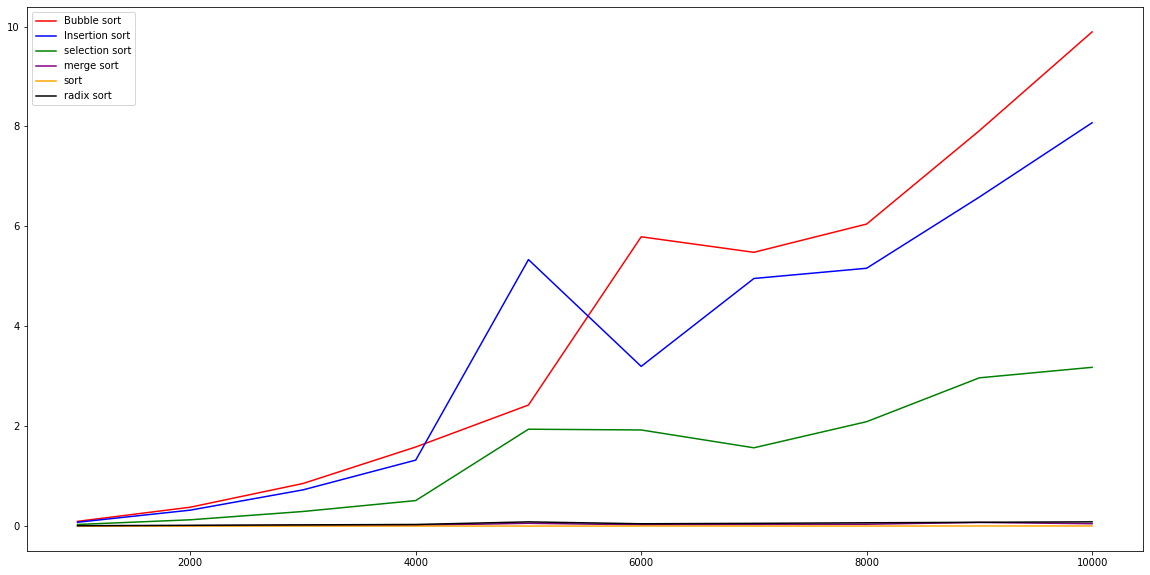

In [ ]:
plt.figure(figsize = (20,10))

plt.plot(tamanhos, tempos['bubble_sort'],    c='red',  label='Bubble sort')
plt.plot(tamanhos, tempos['insertion_sort'], c='blue', label='Insertion sort')
plt.plot(tamanhos, tempos['selection_sort'], c='green', label='selection sort')
plt.plot(tamanhos, tempos['merge_sort'], c='purple', label='merge sort')
plt.plot(tamanhos, tempos['sort'], c='orange', label='sort')
plt.plot(tamanhos, tempos['radix_sort'], c='black', label='radix sort')
plt.legend()
plt.show()

o insertion sort é mais rapido, pois ele consegue ordenar fazendo menos comparações que o bubble, no caso do bubble ele precisa sempre comparar até o fim da lista e no insertion só compara antes do que ja foi ordenado (comparado, fazendo muito menos comparações

In [ ]:
tempos = {'merge_sort': [],
          'sort': [],
          'radix_sort': [],
          'quick_sort': []}

for tamanho in tqdm(tamanhos):


    #merge_sort
    ini = perf_counter()
    merge_sort(entradas[tamanho].copy())
    tempos['merge_sort'].append(perf_counter() - ini)

    #sort python
    ini = perf_counter()
    sort(entradas[tamanho].copy())
    tempos['sort'].append(perf_counter() - ini)

    #radix_sort
    ini = perf_counter()
    radix_sort(entradas[tamanho].copy())
    tempos['radix_sort'].append(perf_counter() - ini)

    #quick_sort
    ini = perf_counter()
    quick_sort(entradas[tamanho].copy(), 0, len(entradas[tamanho]) - 1)
    tempos['quick_sort'].append(perf_counter() - ini)



  0%|          | 0/1000 [00:00<?, ?it/s]

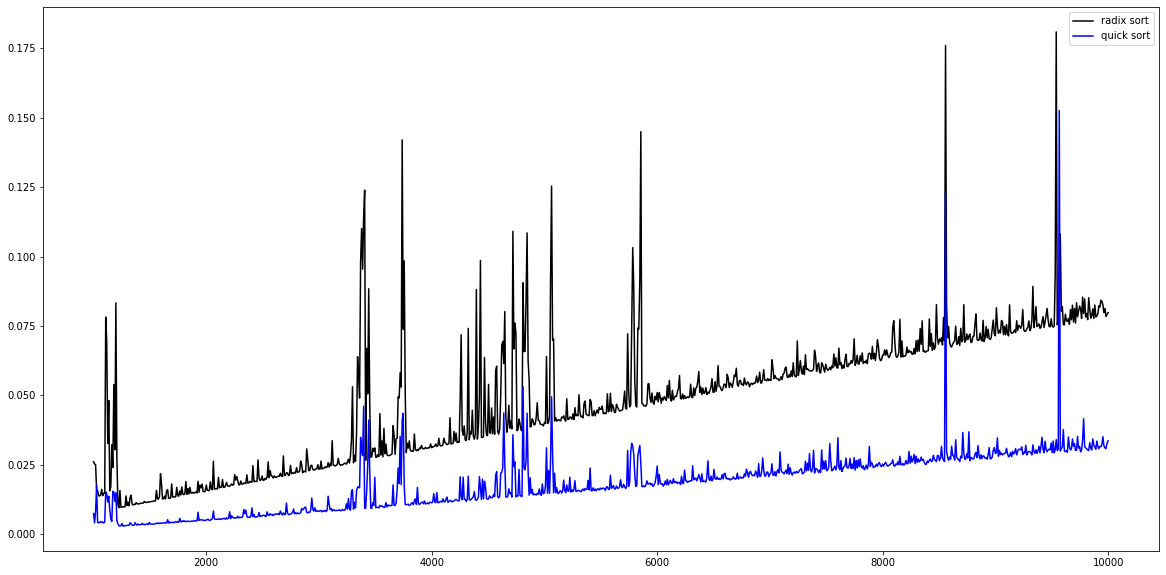

In [ ]:
plt.figure(figsize = (20,10))

# plt.plot(tamanhos, tempos['merge_sort'], c='purple', label='merge sort')
# plt.plot(tamanhos, tempos['sort'], c='orange', label='sort')
plt.plot(tamanhos, tempos['radix_sort'], c='black', label='radix sort')
plt.plot(tamanhos, tempos['quick_sort'], c='blue', label='quick sort')
plt.legend()
plt.show()

In [ ]:
tempos = {'radix_sort': [],
          'quick_sort': []}


teste = [300,350,120,122,150,350,23,34]
#teste = [10,150,50,55,30,53,20,150]
# teste = [23,34,150,350,120,122,300,350]

for tamanho in tqdm(teste):

    #radix_sort
    ini = perf_counter()
    radix_sort(teste)
    tempos['radix_sort'].append(perf_counter() - ini)

    #quick_sort
    ini = perf_counter()
    quick_sort(teste, 0, len(teste) - 1)
    tempos['quick_sort'].append(perf_counter() - ini)




  0%|          | 0/8 [00:00<?, ?it/s]

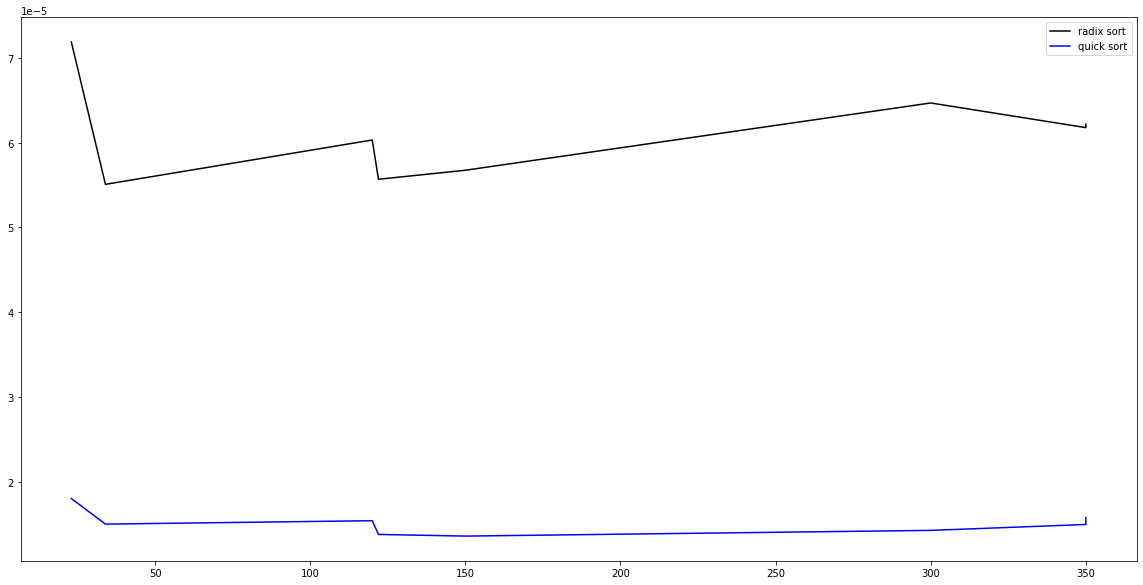

In [ ]:
plt.figure(figsize = (20,10))

plt.plot(teste, tempos['radix_sort'], c='black', label='radix sort')
plt.plot(teste, tempos['quick_sort'], c='blue', label='quick sort')
plt.legend()
plt.show()